Import Libraries

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [3]:
# Load the dataset
data = pd.read_csv('WineQT.csv')

In [4]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1  

In [5]:
# Display basic information about the dataset (data types, missing values, etc.)
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
# Display basic statistical details about the dataset
print("\nStatistical Summary of the Dataset:")
print(data.describe())


Statistical Summary of the Dataset:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0

Data Cleaning and Preprocessing

In [7]:
# Check for missing values
print("\nChecking for missing values:")
missing_values = data.isnull().sum()
print(missing_values)


Checking for missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [8]:
# Check for duplicate rows
print("\nChecking for duplicate rows:")
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Checking for duplicate rows:
Number of duplicate rows: 0


In [9]:
# Dropping the 'Id' column as it's just an identifier
data = data.drop(columns='Id')

In [10]:
# Rename columns
new_column_names = [
    'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
    'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
    'ph', 'sulphates', 'alcohol', 'quality'
]
data.columns = new_column_names

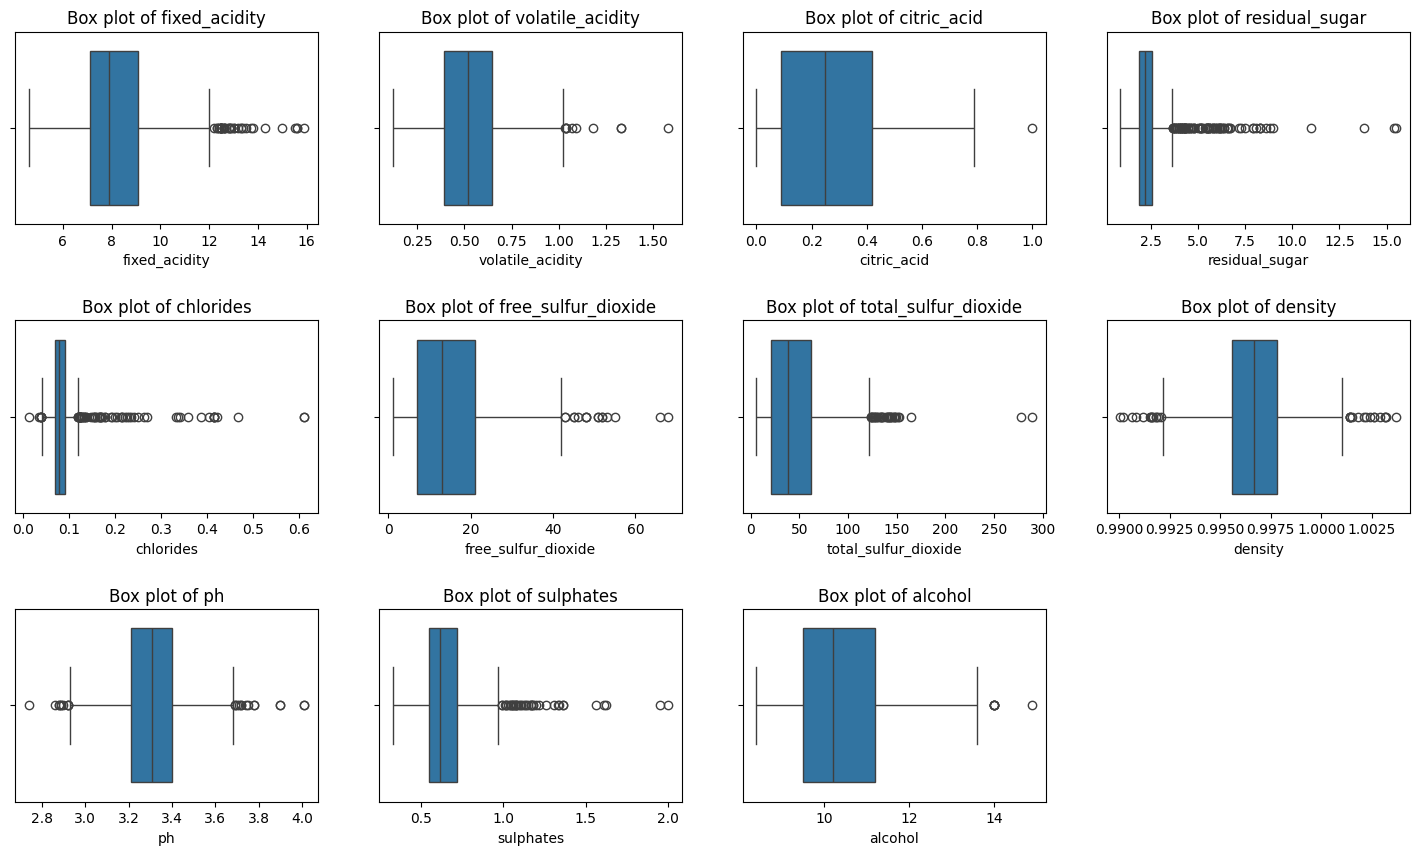

In [12]:
# Box plots for each feature to inspect outliers
plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.5)
for i, column in enumerate(data.columns[:-1], 1):  # excluding 'quality' column
    plt.subplot(3, 4, i)
    sns.boxplot(x=data[column])
    plt.title(f'Box plot of {column}')
plt.show()

In [13]:
# Further investigate the outliers using the IQR method
# Calculate Q1, Q3, and IQR for each feature
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using the IQR method
outliers_iqr = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

# Print the outliers based on IQR method
print("Outliers based on IQR method:")
print(outliers_iqr)


Outliers based on IQR method:
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
5             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1138          False             False        False           False      False   
1139          False             False        False           False      False   
1140          False             False        False           False      False   
1141          False             False        False           False      False   
1142          False             False        False           False      False  

In [14]:
# Handling Outliers - Capping at the 1st and 99th percentiles
for column in data.columns[:-1]:  # excluding 'quality' column
    percentiles = data[column].quantile([0.01, 0.99]).values
    data[column] = np.clip(data[column], percentiles[0], percentiles[1])

Data Transformation

In [15]:
# Creating a new feature 'free_sulfur_dioxide_ratio'
data['free_sulfur_dioxide_ratio'] = data['free_sulfur_dioxide'] / data['total_sulfur_dioxide']


Visualizing the distributions of the features:


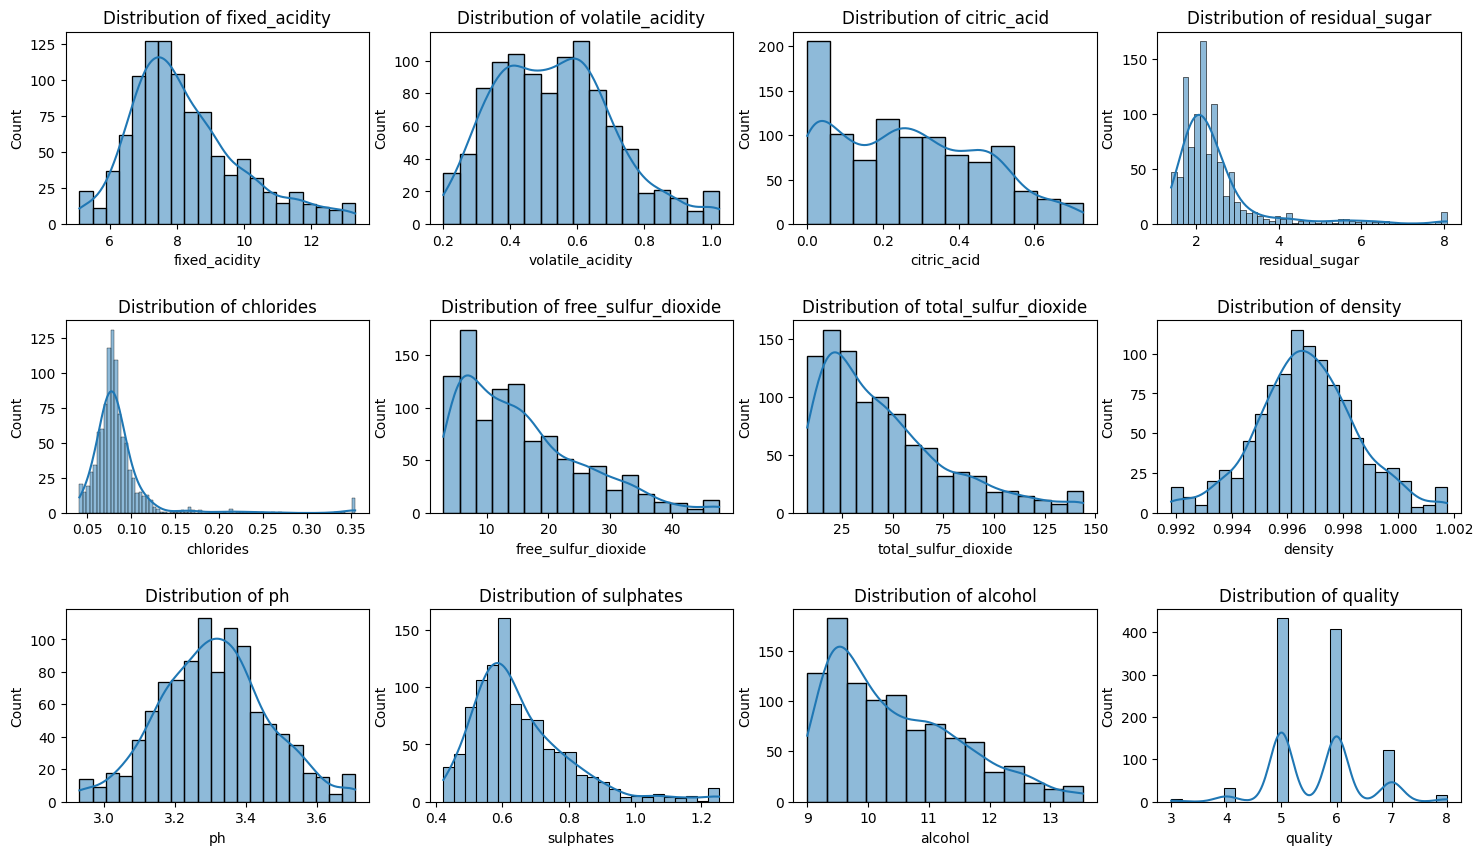

In [16]:
# Visualizing the distributions of the features
print("\nVisualizing the distributions of the features:")
plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.5)
for i, column in enumerate(data.columns[:-1], 1):  # excluding 'quality' column
    plt.subplot(3, 4, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.show()

C:\Users\ovira\AppData\Local\Temp\ipykernel_4908\3731021617.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=data, palette="viridis")


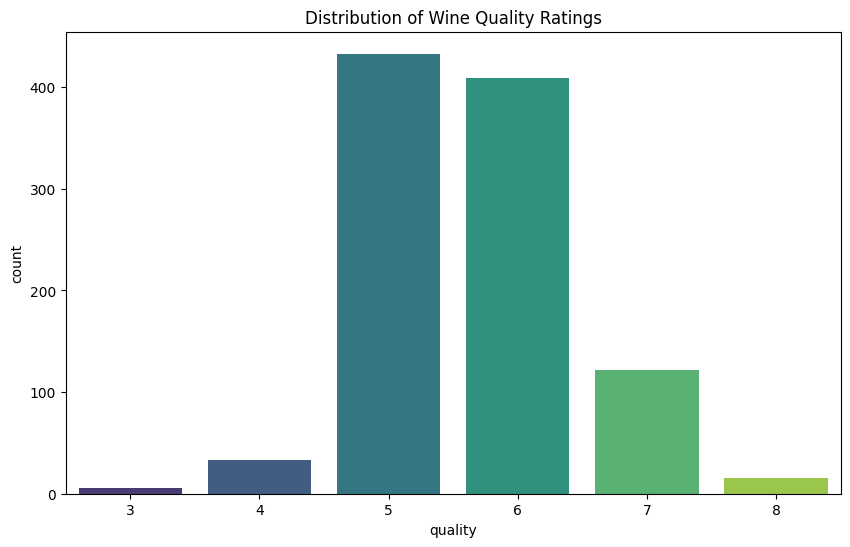

In [17]:
# Quality Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=data, palette="viridis")
plt.title('Distribution of Wine Quality Ratings')
plt.show()

Data Aggregation

In [18]:
# Aggregating data by 'quality' and computing the mean for each feature
print("\nData aggregated by wine quality:")
quality_summary = data.groupby('quality').mean()
print(quality_summary)


Data aggregated by wine quality:
         fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
quality                                                                 
3             8.450000          0.804858     0.211667        2.666667   
4             7.827273          0.697524     0.157524        2.569697   
5             8.118014          0.585587     0.239064        2.497686   
6             8.323961          0.505010     0.269600        2.415638   
7             8.744262          0.391434     0.381242        2.748213   
8             8.686667          0.414000     0.426000        2.646667   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
quality                                                                   
3         0.105333             8.166667             24.500000  0.997682   
4         0.087064            14.848485             40.636364  0.996669   
5         0.090423            16.658106             55.947991  0.997028   
6     

Data Visualization


Correlation Matrix:


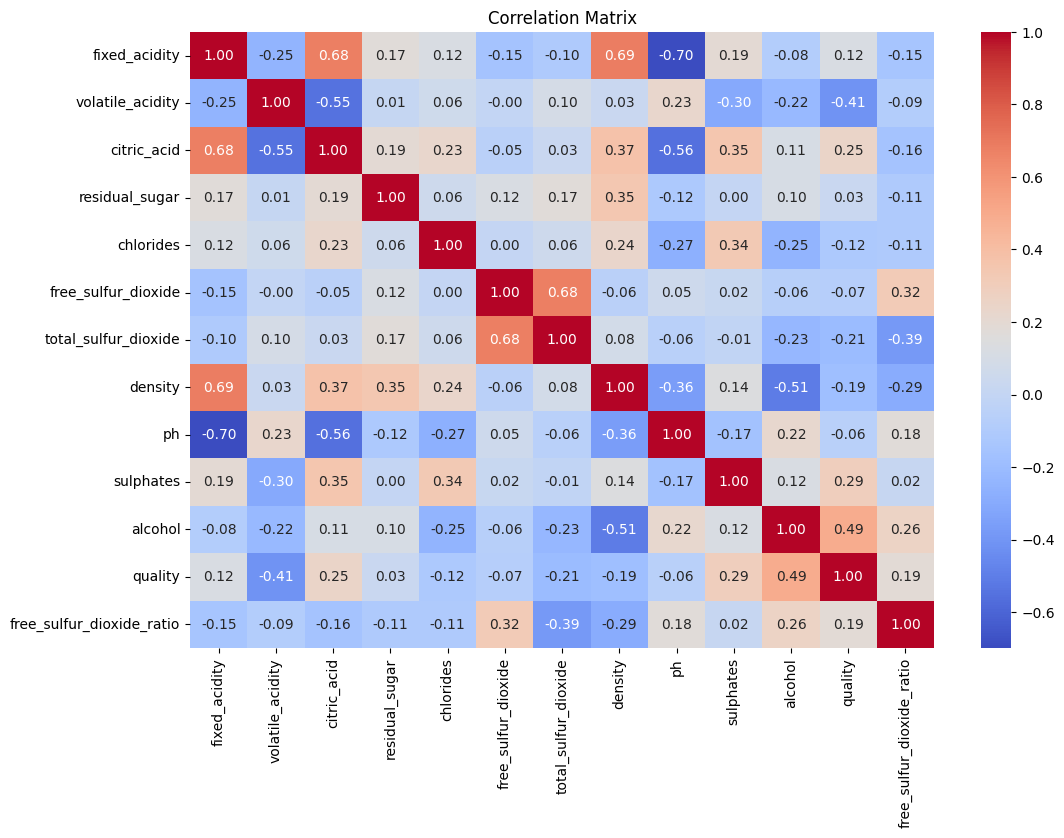

In [19]:
# Correlation matrix
print("\nCorrelation Matrix:")
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Box plots for each feature against wine quality:


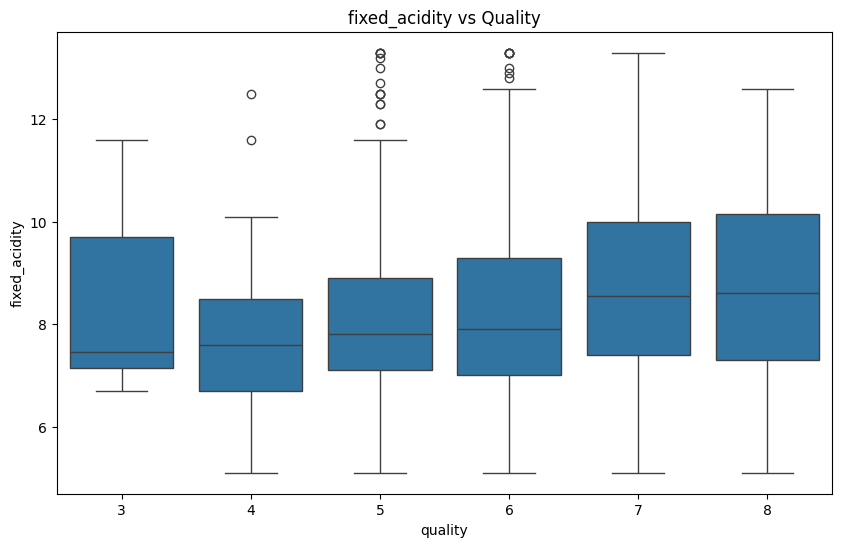

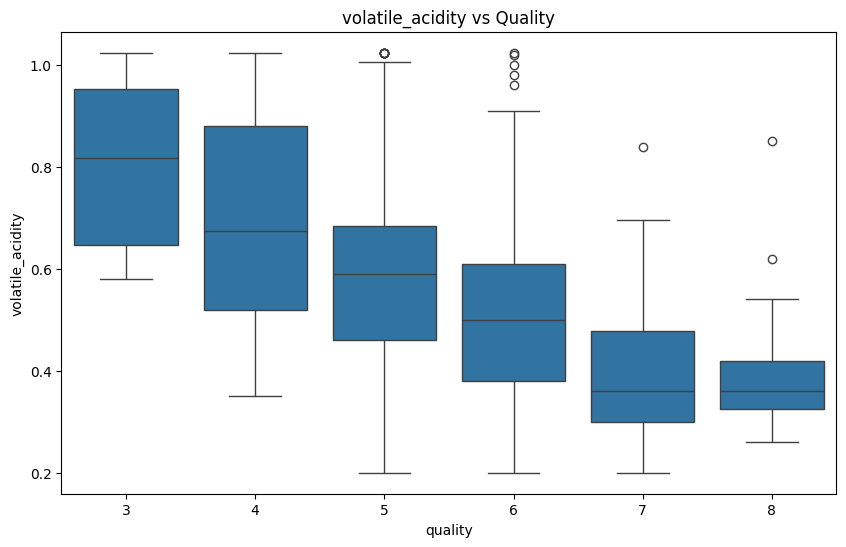

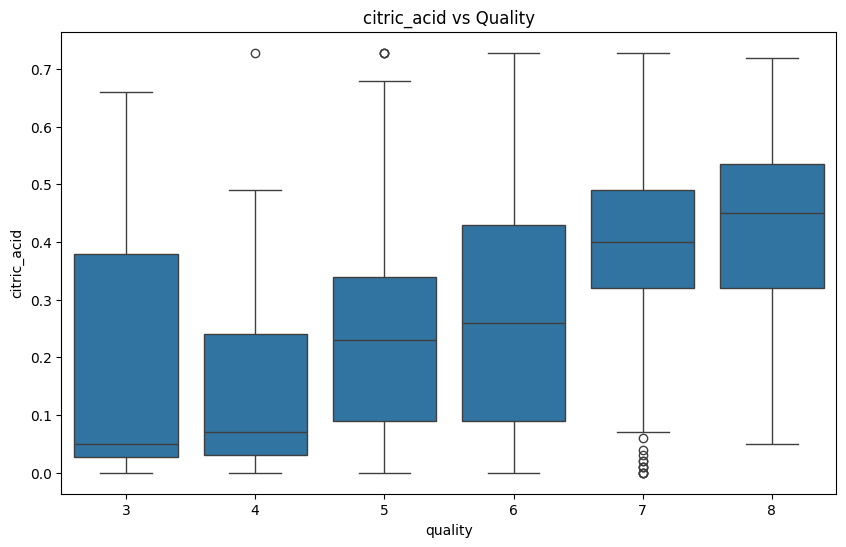

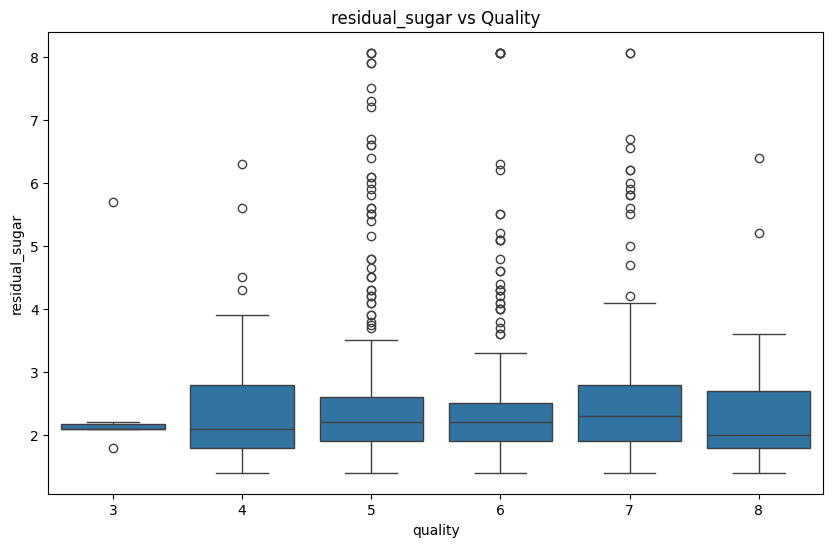

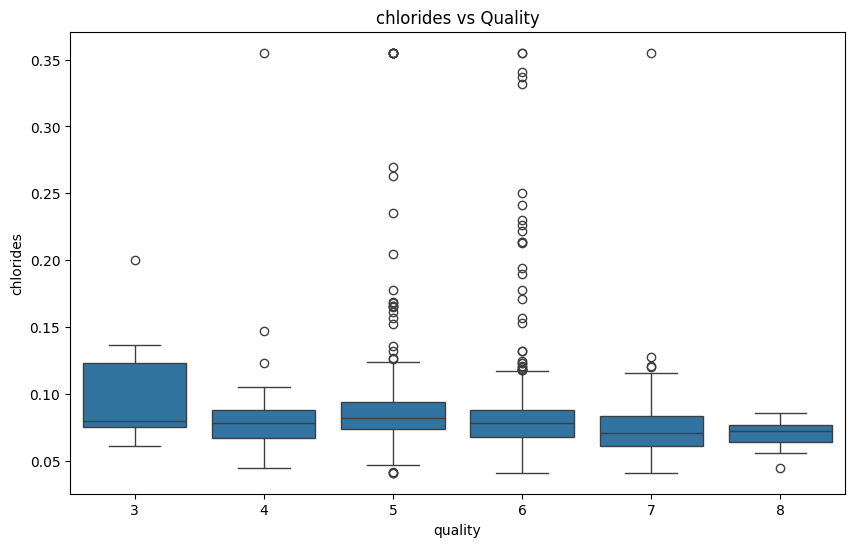

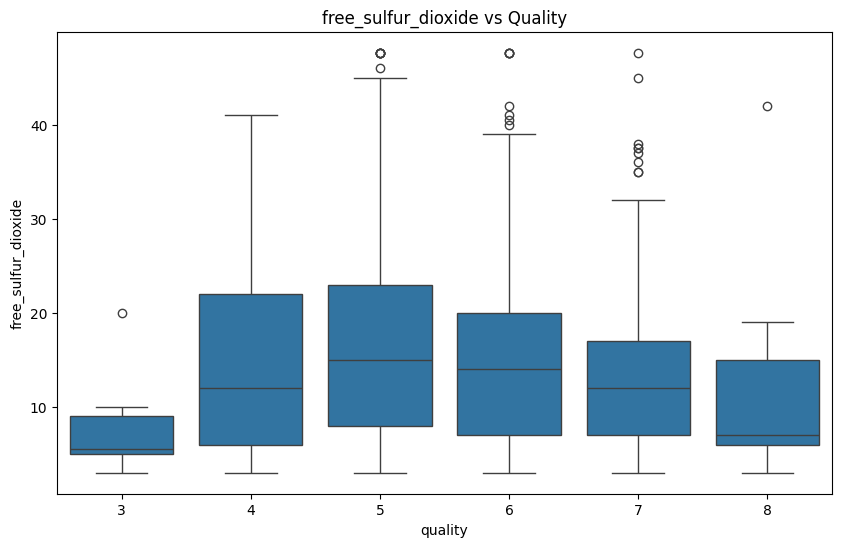

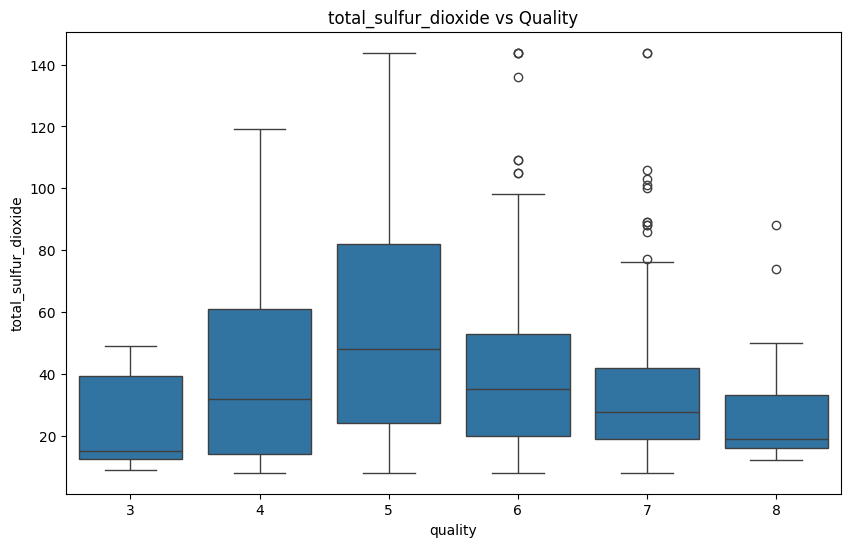

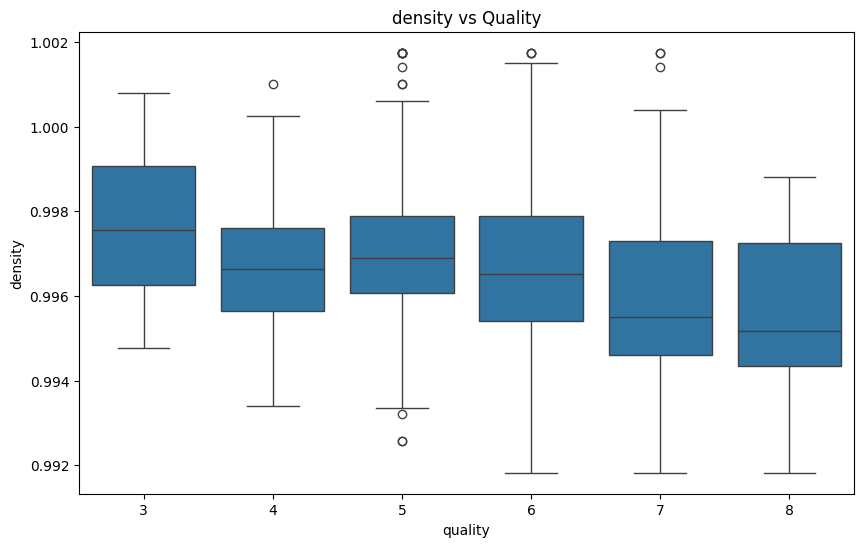

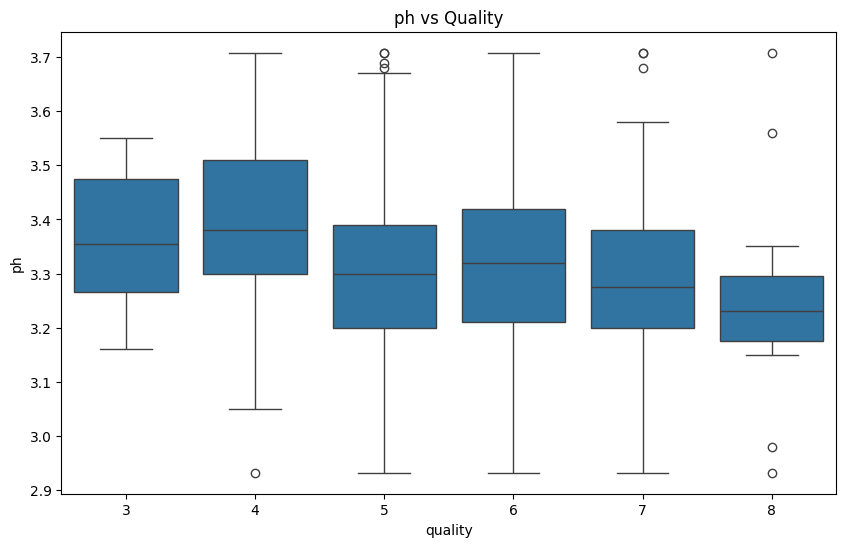

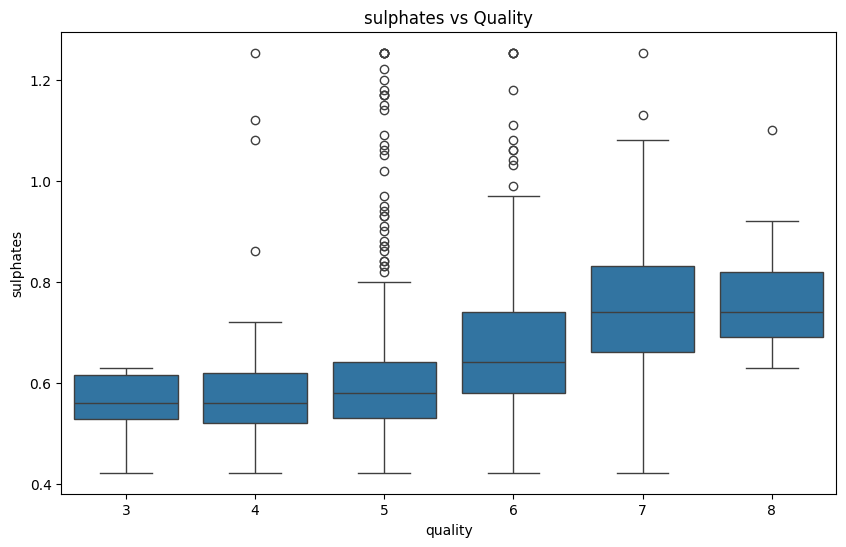

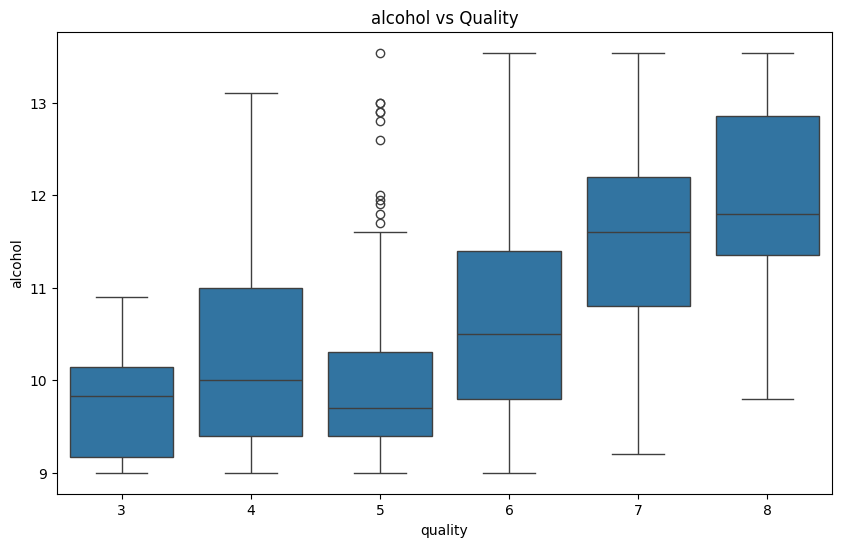

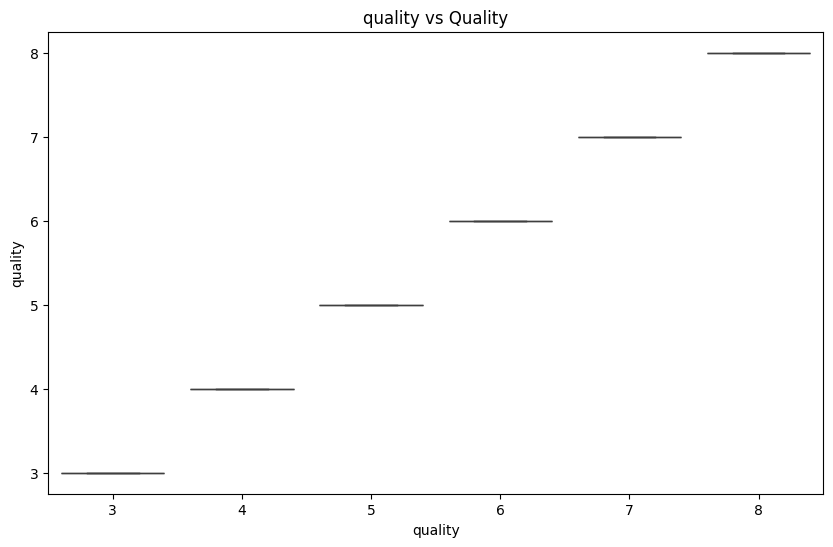

In [20]:
# Box plots for each feature against wine quality
print("\nBox plots for each feature against wine quality:")
for column in data.columns[:-1]:  # excluding 'quality' column
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='quality', y=column, data=data)
    plt.title(f'{column} vs Quality')
    plt.show()

Statistical Analysis

In [21]:
# ANOVA for 'alcohol', 'sulphates', and 'volatile_acidity'
anova_results = {}
for feature in ['alcohol', 'sulphates', 'volatile_acidity']:
    model = ols(f'{feature} ~ C(quality)', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_results[feature] = anova_table
    print(f"ANOVA results for {feature}:\n", anova_table, "\n")

ANOVA results for alcohol:
                 sum_sq      df          F        PR(>F)
C(quality)  327.278226     5.0  77.249453  1.135867e-68
Residual    857.496211  1012.0        NaN           NaN 

ANOVA results for sulphates:
                sum_sq      df          F        PR(>F)
C(quality)   2.149674     5.0  20.387719  1.989073e-19
Residual    21.340982  1012.0        NaN           NaN 

ANOVA results for volatile_acidity:
                sum_sq      df          F        PR(>F)
C(quality)   5.511468     5.0  42.218258  1.455487e-39
Residual    26.422716  1012.0        NaN           NaN 



In [22]:
# Tukey's HSD Test for 'alcohol', 'sulphates', and 'volatile_acidity'
tukey_results = {}
for feature in ['alcohol', 'sulphates', 'volatile_acidity']:
    tukey = pairwise_tukeyhsd(endog=data[feature], groups=data['quality'], alpha=0.05)
    tukey_results[feature] = tukey
    print(f"Tukey's HSD test results for {feature}:\n", tukey.summary(), "\n")


NameError: name 'pairwise_tukeyhsd' is not defined